# **16차시: 분류 모델과 성능 평가**
## 🔍 **학습목표**
- **분류 문제를 위한 대표적인 모델(알고리즘)**을 이해하고 활용할 수 있다.
- 분류 모델의 **성능을 평가하는 주요 지표**를 이해하고 계산할 수 있다.

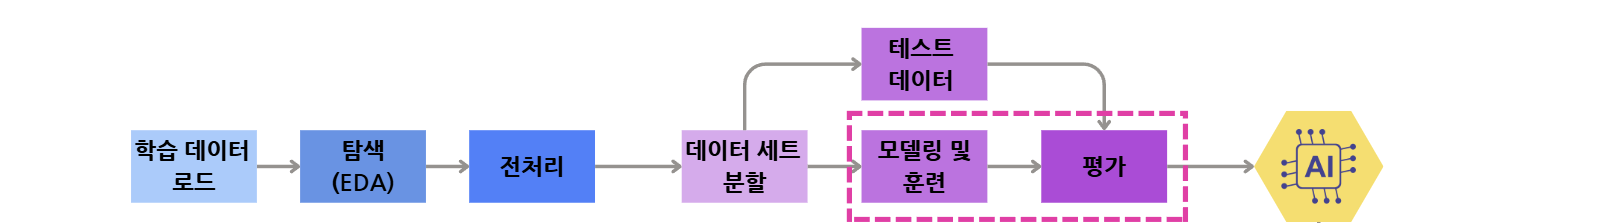


## **📌 대표적인 분류 알고리즘**


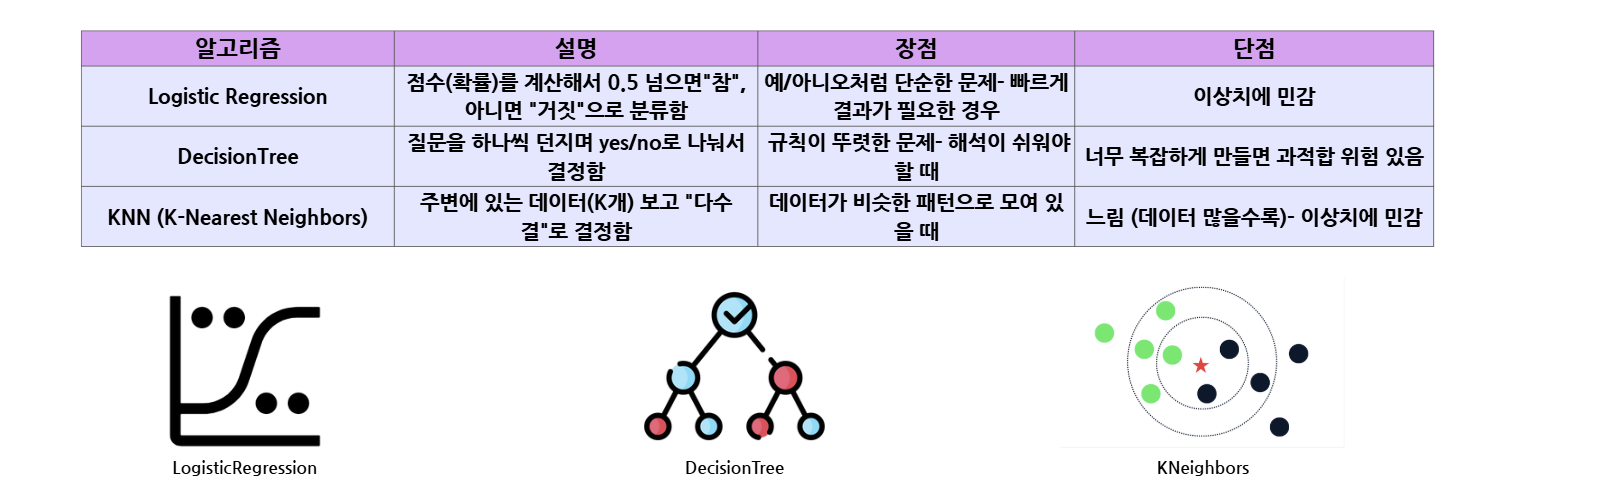

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 학습용 데이터 생성 (공부시간, 집중도 → 합격여부)
df = pd.DataFrame({
    'time': [8, 12, 14, 18, 21, 22, 17, 13, 15, 19],
    'focus': [0.5, 0.7, 0.6, 0.8, 0.9, 0.95, 0.85, 0.7, 0.75, 0.88],
    'pass': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
})


#feature, label 분리

X = df.drop('pass',axis=1)
y = df['pass']

#훈련/검증 데이터 분리
#클래스 균형적으로 분할:stratify=y
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8, stratify=y)


In [ ]:
#사이킷런 라이브러리 코드
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("예측:",y_pred_lr)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("예측:",y_pred_knn)

dt = DecisionTreeClassifier(random_state=43)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("예측:",y_pred_dt)


print("실제:",y_test.values)


예측: [1 1 0]
예측: [1 1 1]
예측: [1 1 0]
실제: [1 1 0]


> - 위의 알고리즘들은 각기 다른 계열의 모델로, AICE 시험에서는 직접 타이핑해야 합니다.
> - '어떤 계열의 모델인지', '라이브러리 임포트 경로와 스펠링'을 정확히 기억해두는 것이 중요합니다.
> - 예) 선형계열은 linear_model, 트리계열은 tree, 앙상블은 ensemble, 이웃기반은 neighbors

---

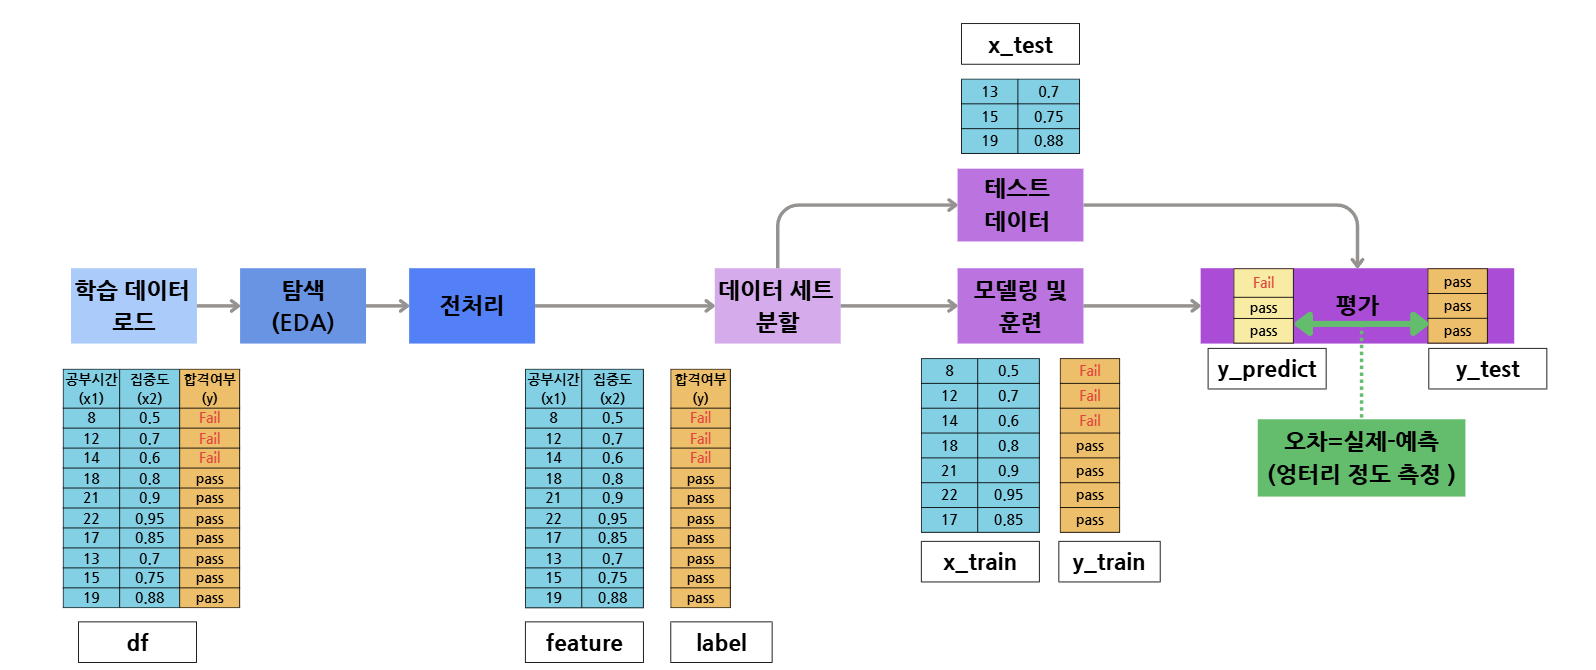

## 📏 **분류 모델의 평가 지표**

- 분류 모델의 성능은 아래의 지표를 통해 판단합니다.
- 각 지표의 수치를 올바르게 해석해야 **적합한 알고리즘**과 **좋은 모델**을 선택할 수 있습니다.


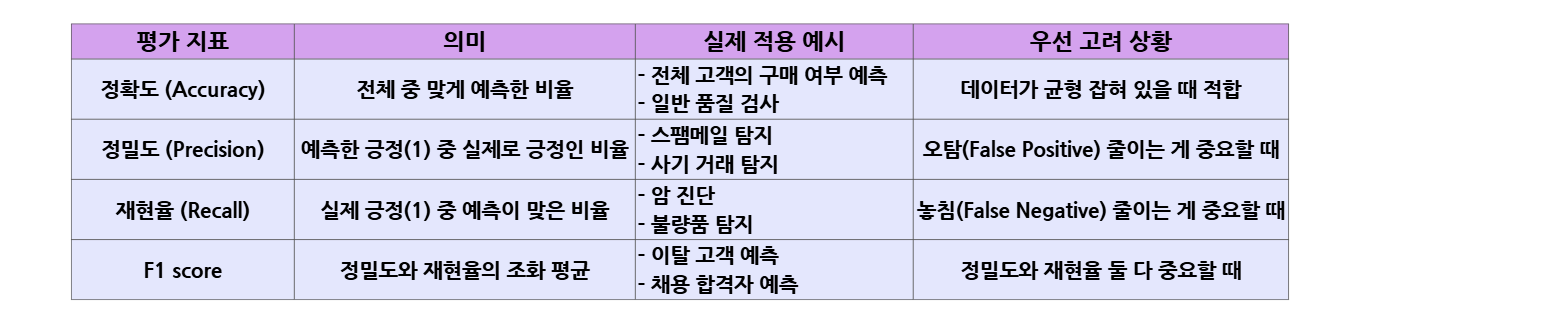

In [ ]:
from sklearn.metrics import accuracy_score
# 예측 결과와 실제 값 (예시: 이진 분류 0 또는 1)
y_real = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1]
y_pred = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

# 평가 지표 계산
acc = accuracy_score(y_real, y_pred)          # 정확도

# 출력
print("Accuracy:", acc)


Accuracy: 0.9


## **베스트 알고리즘 선별**

In [ ]:
print("[LR]","Accuracy:", accuracy_score(y_test, y_pred_lr))
print("[KNN]","Accuracy:", accuracy_score(y_test, y_pred_knn))
print("[DT]","Accuracy:", accuracy_score(y_test, y_pred_dt))


[LR] Accuracy: 1.0
[KNN] Accuracy: 0.6666666666666666
[DT] Accuracy: 1.0


> **가장 베스트 알고리즘은?**
> - LogisticRegression,DecisionTree
> - 정확도가 1로 모든 검증 데이터에 대해 정확하게 예측하였다.

---

## **변수 중요도 확인: only DT**
- tree 계열의 알고리즘은 변수 중요도를 확인할 수 있습니다.
- 예측에 얼마나 기여했는지 정량적으로 판단할 수 있으며, 해석과 변수 선택에 유용합니다.


In [ ]:
# 변수 영향도
print("DT",dt.feature_importances_)

DT [0.65 0.35]


<Axes: xlabel='importance', ylabel='feature'>

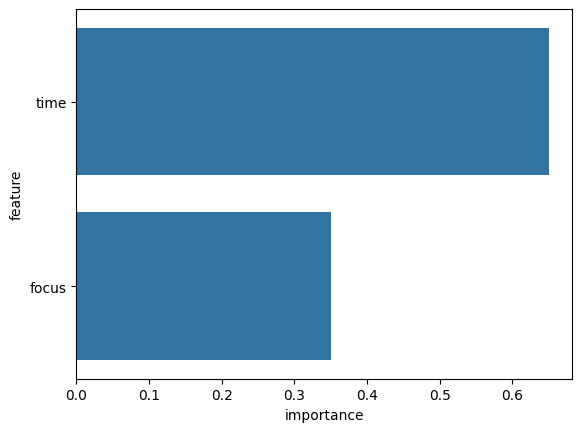

In [ ]:
import_df = pd.DataFrame({"importance":dt.feature_importances_,"feature":x_train.columns}).sort_values(by="importance",ascending=False)

import seaborn as sns
sns.barplot(y="feature",x="importance",data=import_df)

>  DT알고리즘에 의하면 시험 합격 유부를 예측하는데 있어 `time` 변수가 중요한 변수라고 볼 수 있다.

>

---

## **연습 문제**

### **온라인 교육 플랫폼 회원 이탈 예측 모델**

**[데이터 설명: online_edu_churn.csv]**
- age: 사용자 나이 (일부 결측값 있음)
- salary: 사용자의 연간 추정 소득 (단위: 원)
- experience_years: 해당 분야 또는 업무 경력 (년 단위)
- weekly_study_hours: 주당 평균 학습 시간 (시간)
- courses_completed: 수강 완료한 강의 수
- login_days_past30: 최근 30일 간 로그인한 총 일수
- membership: 회원 등급 (예: basic, premium 등)
- device: 주 사용 기기 (예: desktop, mobile, tablet)
- region: 거주 지역 (예: 서울특별시, 경기도 등)
- promo_opt_in: 마케팅 수신 동의 여부 (1: 동의, 0: 비동의)
- num_promo_emails_last3m: 최근 3개월간 받은 프로모션 이메일 수
- **churn: 이탈 여부 (1: 이탈, 0: 유지) → Target**

### **문제 1. 데이터를 불러오고, 문제 유형을 변수 `답안01`에 저장하시오.**

- `online_edu_churn.csv` 파일을 읽고 데이터프레임 변수 `df`에 저장하시오.
- 이 문제는 회귀 문제인가, 분류 문제인가?
- `답안01 = '회귀'` 또는 `답안01 = '이진분류'` 또는 `답안01 = '다중분류'` 형태로 저장하시오.



In [ ]:
# 여기에 코드를 작성하세요.


In [ ]:
import pandas as pd

df = pd.read_csv("online_edu_churn.csv")
print(df['churn'].nunique())

답안01 = '이진분류'

2


### **문제 2. 아래의 전처리 코드를 실행하고, 처리 후 관측치 개수를 변수 답안02에 저장하시오.**

In [ ]:
#전처리 코드를 먼저 실행하세요.
copy_df = df.copy()

# age 결측치는 평균으로 채움
copy_df['age'] = copy_df['age'].fillna(copy_df['age'].mean())
copy_df = copy_df.dropna()

# 범주형 변수 자동 인코딩
encode_df = pd.get_dummies(copy_df, drop_first=True, dtype=int)

In [ ]:
# 여기에 코드를 작성하세요.

In [ ]:

답안02 = encode_df.shape[0]
답안02

4767

### **문제 3.  변수 feature,label 데이터로 분리하시오**
- 대상 데이터프레임: encode_df
- 타겟 변수: churn
- 설명 변수: 나머지 전체 컬럼

In [ ]:
# 여기에 코드를 작성하세요.

In [ ]:
feature = encode_df.drop('churn', axis=1)
label = encode_df['churn']
feature.shape,label.shape

((4767, 19), (4767,))

### **문제 4.  학습/검증 데이터로 분할하시오.**
- 훈련:검증 = 8:2
- random_state = 42
- 클래스가 균형있게 분할될 것:stratify
- train_test_split 사용
- 결과는 다음 변수에 저장할 것:X_train, X_valid, y_train, y_valid

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(feature, label, test_size=0.2, random_state=42,stratify=label)


### **문제 5. 다음 조건으로 모델을 학습하시오.**
- Logistic Regression
    - 기본 설정 사용

- Decision Tree
    - max_depth = 5
    - min_samples_split = 4
    - random_state = 42

- KNeighbors
    - n_neighbors = 5


- 각 모델을 학습하고 다음 변수에 저장하시오:
    - logi: 로지스틱회귀 모델
    - dt : 결정트리 모델
    - knn : 이웃기반 모델

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

logi = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

logi.fit(, )
dt.fit(, )
knn.fit(, )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

logi = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

logi.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### **문제 6. 검증 데이터를 활용하여 정확도(accuracy)를 계산하고, 가장 성능이 좋은 모델명을 변수 답안06에 저장하시오.**

- 각 모델에 대해 예측값을 다음 변수에 저장하시오:
    - y_pred_logi, y_pred_dt, y_pred_knn
- accuracy를 비교하여 가장 높은 정확도의 모델명을 답안06에 저장하시오.
(예: 'logistic', 'decisiontree', 'knn')

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.metrics import accuracy_score

y_pred_logi = logi.predict()
y_pred_dt = dt.predict()
y_pred_knn = knn.predict()

acc_logi = accuracy_score(, )
acc_dt = accuracy_score(, )
acc_knn = accuracy_score(, )


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_logi = logi.predict(X_valid)
y_pred_dt = dt.predict(X_valid)
y_pred_knn = knn.predict(X_valid)

acc_logi = accuracy_score( y_valid, y_pred_logi)
acc_dt = accuracy_score(y_valid, y_pred_dt)
acc_knn = accuracy_score(y_valid, y_pred_knn)

# 정확도 비교
print(acc_logi,acc_dt,acc_knn)
답안06 = 'decisiontree'

0.60062893081761 0.9937106918238994 0.5272536687631028


### **문제 7. 결정 트리 모델이 예측에 어떤 변수를 중요하게 사용했는지를 확인하고, 변수`답안07`에 저장하시오.**

-  변수 영향도가 가장 높은 컬럼명을 `답안07`에 저장하시오.

In [ ]:
# 변수 영향도를 시각화하는 코드를 먼저 실행하시오.
import matplotlib.pyplot as plt
import seaborn as sns

# 중요도 추출
importances = dt.feature_importances_
features = feature.columns

# 데이터프레임으로 정리 후 정렬
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
2,experience_years,0.260407
6,promo_opt_in,0.238904
8,membership_premium,0.226804
5,login_days_past30,0.151397
9,membership_vip,0.121135
7,num_promo_emails_last3m,0.001354
0,age,0.000000
1,salary,0.000000
4,courses_completed,0.000000
3,weekly_study_hours,0.000000


In [ ]:
# 여기에 코드를 작성하세요.
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 중요도 추출
importances = dt.feature_importances_
features = feature.columns

# 데이터프레임으로 정리 후 정렬
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

답안07=importance_df.iloc[0,0]
답안07


'experience_years'